In [5]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [6]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [7]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [8]:
#df = create_input_data.read_data(csv_file_name="../data/processed/past_25_completed_qm.csv", parse_dates_col=[4,5,6])
df = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_50_completed_qm.csv", parse_dates_col=[4,5,6])
df

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm41,qm42,qm43,qm44,qm45,qm46,qm47,qm48,qm49,qm50
0,9084275,5a1c85eb8bc9d4da20ce12b96ecc7bb9d79d3ef991e990...,38112a802292edea407a0678c9c75259cba6473c7acc62...,COMPLETED,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 18:10:39,1,1,2880,...,0,0,0,0,0,0,0,0,0,0
1,9084279,b4b4df9343fe9f7110ec15863fb5df13fbd20268383ba9...,9490a70089cec5b24a43f5f535efc92180fc5383256414...,COMPLETED,2022-02-01 00:11:44,2022-02-01 07:44:39,2022-02-01 09:00:46,78,6,180,...,0,0,0,0,0,0,0,0,0,0
2,9084280,c593da51b38e5fd95cb891ec53a4b70c41ca189bf4b92d...,3a61323a47592f74d9ca0004a066b2019b8fc1d4c53283...,COMPLETED,2022-02-01 00:12:27,2022-02-01 00:12:27,2022-02-01 00:12:39,68,1,1,...,0,0,0,0,0,0,0,0,0,0
3,9084291,db3b1cee65585e6744e72478a737eafaa23ce99e81344e...,118341ad5b87466ce69926005d0d6ba762bf86b8996da7...,COMPLETED,2022-02-01 00:16:45,2022-02-01 04:43:31,2022-02-01 06:15:04,64,1,2880,...,0,0,0,0,0,0,0,0,0,0
4,9084294,bb3cdc72e4a6895d67d00ccd3c9cf0f65bdc59f32dfa9e...,664af438b9c1ef9ba68a8105b0ce50f87b8bc462486043...,COMPLETED,2022-02-01 00:17:49,2022-02-01 00:17:51,2022-02-01 00:58:55,64,1,58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,10056827,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323212,10056828,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323213,10056829,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323214,10056831,4c6876a9c556f9039eb938f387f82f71400b3eafa372b2...,140bedbf9c3f6d56a9846d2ba7088798683f4da0c24823...,COMPLETED,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,...,0,0,0,0,0,0,0,0,0,0


In [9]:
num_zeros, non_zeros = explore_util.get_num_of_zeros(df,'qm25')


Number of zeros in column: qm25: 233672
Number of elements in the column: 323216
Non-zero elements in the column: 89544


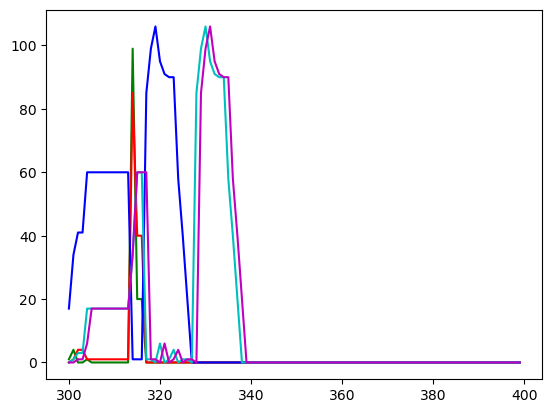

In [10]:
explore_util.explore_five_plots(df=df,col_name_list=['qm1','qm2','qm12','qm23','qm24'], num_col=5, color_list=['g','r','b','c','m'],lo=300, hi=400)

In [11]:
df = build_features.remove_default_cols(df)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm41,qm42,qm43,qm44,qm45,qm46,qm47,qm48,qm49,qm50
0,1,1,2880,0,131060,143,20382,7955377,1080,0,...,0,0,0,0,0,0,0,0,0,0
1,78,6,180,452,131060,143,20382,7955377,76,0,...,0,0,0,0,0,0,0,0,0,0
2,68,1,1,0,131240,144,20382,7955377,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,1,2880,266,131100,142,20383,7955378,91,0,...,0,0,0,0,0,0,0,0,0,0
4,64,1,58,0,133980,143,20383,7955378,41,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = build_features.slice_df(df,1000,323216)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm41,qm42,qm43,qm44,qm45,qm46,qm47,qm48,qm49,qm50
1000,1,1,120,10,268796,275,20395,7967258,10,0,...,0,0,0,0,4,0,6,1,1,1
1001,1,1,120,9,268916,276,20395,7967258,9,0,...,0,0,0,0,4,0,6,1,1,1
1002,1,1,120,9,269036,277,20395,7967258,9,0,...,0,0,0,0,4,0,6,1,1,1
1003,1,1,120,9,269156,278,20395,7967258,8,0,...,0,0,0,0,4,0,6,1,1,1
1004,1,1,120,9,269276,279,20395,7967258,8,0,...,0,0,0,0,4,0,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
### Remove the queue_minutes column from the training set
X_historydata=build_features.remove_specific_col(df,'queue_minutes')
Y_waittimedata=df['queue_minutes']

In [14]:
X_historydata
#Y_waittimedata

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm41,qm42,qm43,qm44,qm45,qm46,qm47,qm48,qm49,qm50
1000,1,1,120,268796,275,20395,7967258,10,0,0,...,0,0,0,0,4,0,6,1,1,1
1001,1,1,120,268916,276,20395,7967258,9,0,0,...,0,0,0,0,4,0,6,1,1,1
1002,1,1,120,269036,277,20395,7967258,9,0,0,...,0,0,0,0,4,0,6,1,1,1
1003,1,1,120,269156,278,20395,7967258,8,0,0,...,0,0,0,0,4,0,6,1,1,1
1004,1,1,120,269276,279,20395,7967258,8,0,0,...,0,0,0,0,4,0,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,898116,394,22918,9692906,23,0,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,898236,395,22918,9692906,54,0,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,898356,396,22918,9692906,38,0,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,898356,396,22918,9692906,129,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_historydata_train_rm, X_historydata_test_rm, Y_waittimedata_train, Y_waittimedata_test=build_features.split_training_test_data(X_historydata, Y_waittimedata)

shapes: X train: (241662, 58) Y train: (241662,)
shapes: X test: (80554, 58)Y test: (80554,)


In [16]:
X_historydata_test = build_features.remove_specific_col(X_historydata_test_rm,'run_minutes')
X_historydata_train = build_features.remove_specific_col(X_historydata_train_rm,'run_minutes')

In [17]:
X_historydata_train

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm41,qm42,qm43,qm44,qm45,qm46,qm47,qm48,qm49,qm50
217891,48,1,120,152340,84,22226,9143715,0,1,0,...,0,0,0,0,0,0,0,0,0,0
61850,120,5,120,617365,358,20807,8085582,0,0,0,...,0,1,0,0,4,0,0,0,0,0
57136,2,1,60,254110,174,20804,8084622,1,0,0,...,0,112,113,111,112,0,0,113,114,114
121508,240,20,6,3642,14,21179,8272622,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182686,16,1,119,18060,8,21894,8932031,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120879,64,1,2880,45055,87,21169,8268322,1,39,35,...,64,64,64,65,65,65,64,62,61,61
260178,16,1,119,0,0,22480,9318710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132932,96,2,15,39120,27,21315,8345656,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147867,44,1,2880,289270,160,21442,8411807,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_historydata_norm, scaler = build_features.standardization(X_historydata_train)

MinMaxScaler()
data max = [3.276800e+04 2.560000e+02 9.000000e+03 1.414325e+06 7.010000e+02
 2.291800e+04 9.692906e+06 6.670000e+02 3.154000e+03 3.154000e+03
 3.155000e+03 3.156000e+03 3.158000e+03 3.164000e+03 3.191000e+03
 3.192000e+03 3.193000e+03 3.193000e+03 3.195000e+03 3.195000e+03
 3.205000e+03 3.239000e+03 3.156000e+03 3.158000e+03 3.164000e+03
 3.191000e+03 3.192000e+03 3.269000e+03 3.193000e+03 3.195000e+03
 3.284000e+03 3.205000e+03 3.287000e+03 3.239000e+03 3.288000e+03
 3.290000e+03 3.239000e+03 3.291000e+03 3.269000e+03 3.269000e+03
 3.269000e+03 3.284000e+03 3.284000e+03 3.287000e+03 3.287000e+03
 3.288000e+03 3.290000e+03 3.290000e+03 3.291000e+03 3.291000e+03
 3.291000e+03 3.291000e+03 3.291000e+03 3.288000e+03 3.291000e+03
 3.288000e+03 3.291000e+03]
data min = [1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 2.039500e+04 7.967258e+06 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+

In [19]:
from importlib import reload
reload(train_model)
h5_file="../models/correct_anon_50past_corrected_qm_model.h5"
epochs=500
batch_size=64
validation_spilt=0.2
model = train_model.create_default_model(input_shape=57)
checkpoint_cb,early_stopping_cb = train_model.create_checkpoint_cb(h5_file=h5_file)
model, hist = train_model.train_model_cb_cp(X_historydata_norm, Y_waittimedata_train, model,checkpoint_cb,
                early_stopping_cb,h5_file, epochs, batch_size, validation_spilt)

Epoch 1/500


2023-09-20 11:45:59.354706: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44079012 exceeds 10% of free system memory.


2976/3021 [============================>.] - ETA: 0s - loss: 210539.6406 - mae: 123.1838

2023-09-20 11:46:01.391450: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 11019924 exceeds 10% of free system memory.


3021/3021 [==============================] - 2s 718us/step - loss: 209858.0938 - mae: 123.0812 - val_loss: 211283.2812 - val_mae: 113.0875
Epoch 2/500
3021/3021 [==============================] - 2s 685us/step - loss: 172156.0938 - mae: 112.5756 - val_loss: 178053.6875 - val_mae: 100.9417
Epoch 3/500
3021/3021 [==============================] - 2s 692us/step - loss: 144295.7812 - mae: 96.7413 - val_loss: 159998.0312 - val_mae: 92.9782
Epoch 4/500
3021/3021 [==============================] - 2s 676us/step - loss: 135723.5625 - mae: 89.5694 - val_loss: 158536.5469 - val_mae: 108.3762
Epoch 5/500
3021/3021 [==============================] - 2s 679us/step - loss: 132301.7188 - mae: 87.3117 - val_loss: 155522.5000 - val_mae: 85.6154
Epoch 6/500
3021/3021 [==============================] - 2s 684us/step - loss: 130585.7031 - mae: 85.8679 - val_loss: 150541.0156 - val_mae: 82.5642
Epoch 7/500
3021/3021 [==============================] - 2s 677us/step - loss: 128654.5547 - mae: 84.5574 - val_l

In [20]:
predict_model.evaluate(model,scaler,X_historydata_test, Y_waittimedata_test)

 205/2518 [=>............................] - ETA: 1s - loss: 61730.3984 - mae: 70.5132

2023-09-20 11:57:29.448348: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18366312 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 454us/step - loss: 75033.6562 - mae: 67.6863
loss — -> 75033.65625
mae — -> 67.68633270263672


In [21]:
from importlib import reload
reload(predict_model)
y_pred = predict_model.predict_and_compare(model,scaler, X_historydata_test, Y_waittimedata_test)

 227/2518 [=>............................] - ETA: 1s

2023-09-20 11:57:33.146167: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18366312 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 415us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :19895
number of zeros in the data : 0
number of positive numbers  :60659

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 19895
number of positive numbers  :60659



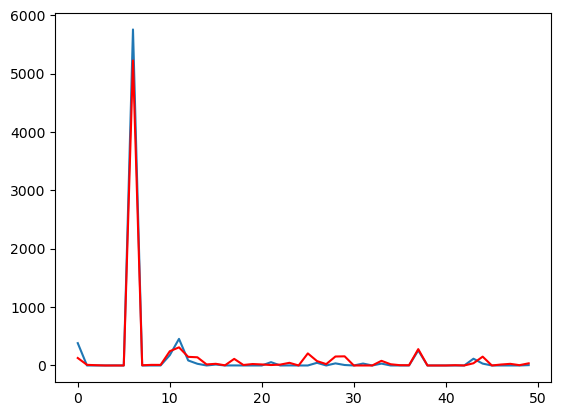

In [22]:
reload(predict_model)
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test, y_pred, 150, 200)

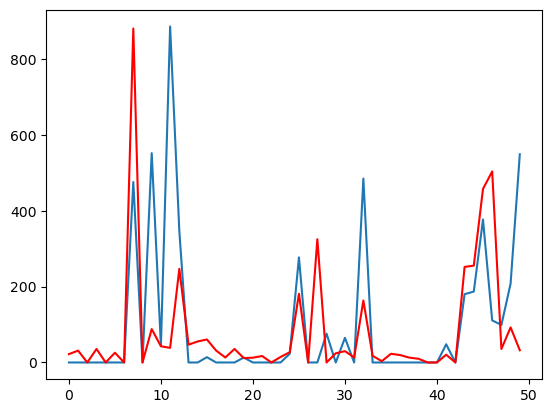

In [23]:
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test, y_pred, 200,250)


In [24]:
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,207,210, "set 1: 207: 210")
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,225,228, "set2: 225-228")
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,228, 231, "set3: 228-231")

------------------set 1: 207: 210-----------------------
qm test:[476   0 552]
qm pred:[880.6965   0.      88.1505]
X test:        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
12287       128       8          960           279632               345   
221064        6       1           60           510355               301   
162775      192       3          720            57405               125   

        running_num_jobs  running_minutes  qm1  qm2  qm3  ...  qm41  qm42  \
12287              20440          7989204    1    0    0  ...     0     0   
221064             22259          9161393    0    0    7  ...    17     7   
162775             21691          8754769    1    0    0  ...     0     0   

        qm43  qm44  qm45  qm46  qm47  qm48  qm49  qm50  
12287      0    69     2     0     0     0     0     1  
221064     7     7     0    55     1     0    55     2  
162775     0     0     0     0     0     1     0     0  

[3 rows x 57 columns]
----------------

In [25]:
print(X_historydata_test_rm)
run_mins = X_historydata_test_rm["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))


        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
67571       256       8          120           287137               134   
50519        96       2           15            97795                71   
204988       64       1         2880             9360                 4   
213449       32       1          900            95220                75   
199380       32       1          720             1440                 2   
...         ...     ...          ...              ...               ...   
20257       128       2         1440           300982               226   
231778       48       1          120            60330                45   
273373       64       2          240                0                 0   
141023       96       2           15                0                 0   
172448      144       3            5            37980                15   

        running_num_jobs  running_minutes  run_minutes  qm1  qm2  ...  qm41  \
67571              2

In [27]:
reload(analyze_pred)
analyze_pred.analysis_pred_vs_orig(2000,200, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    156
1     44
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    197
m      3
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 44-3=41

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    181
1     19
Name: count, dtype: int64


In [28]:
reload(analyze_pred)
analyze_pred.analysis_pred_vs_orig(0,80554, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    64608
1    15946
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    78244
m     2310
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 15946-2310=13636

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    72066
1     8488
Name: count, dtype: int64


In [29]:
analyze_pred.analysis_pred_vs_orig(0,80554, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=45, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 45: scheduled?
0    69266
1    11288
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    77984
m     2570
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 11288-2570=8718

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    76727
1     3827
Name: count, dtype: int64


In [30]:
analyze_pred.analysis_pred_vs_orig(0,80554, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,
                                   provision_time=60, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 60: scheduled?
0    70969
1     9585
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    78019
m     2535
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 9585-2535=7050

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    77562
1     2992
Name: count, dtype: int64


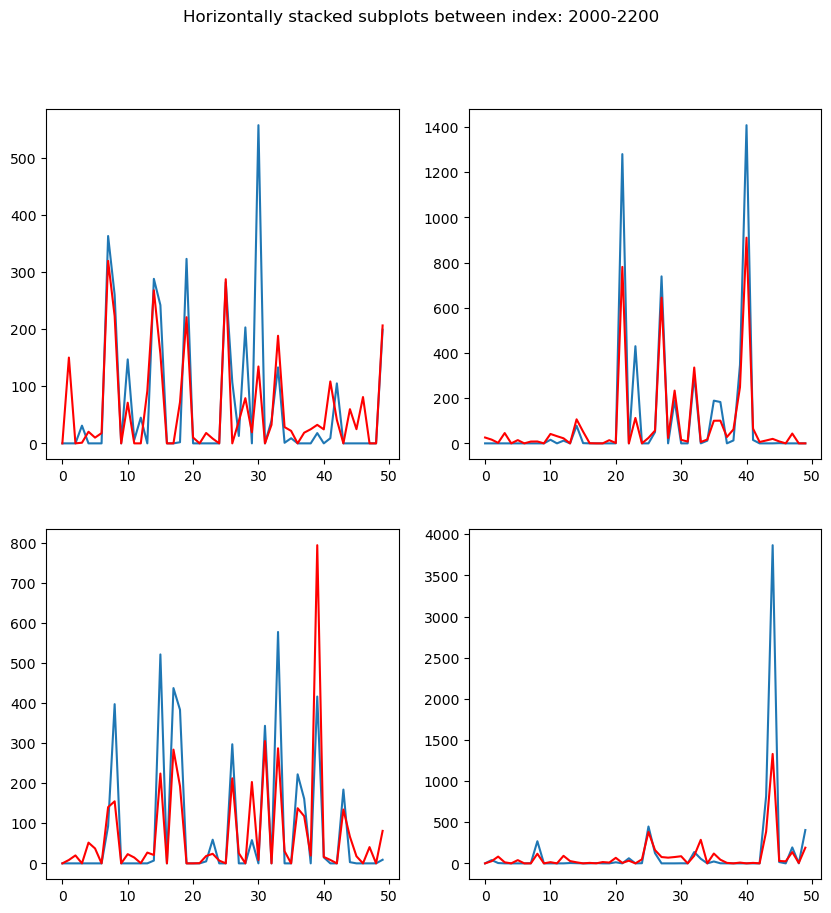

In [31]:
reload(analyze_pred)
analyze_pred.plot_pred_vs_orig(2000,50,Y_waittimedata_test,y_pred.ravel())

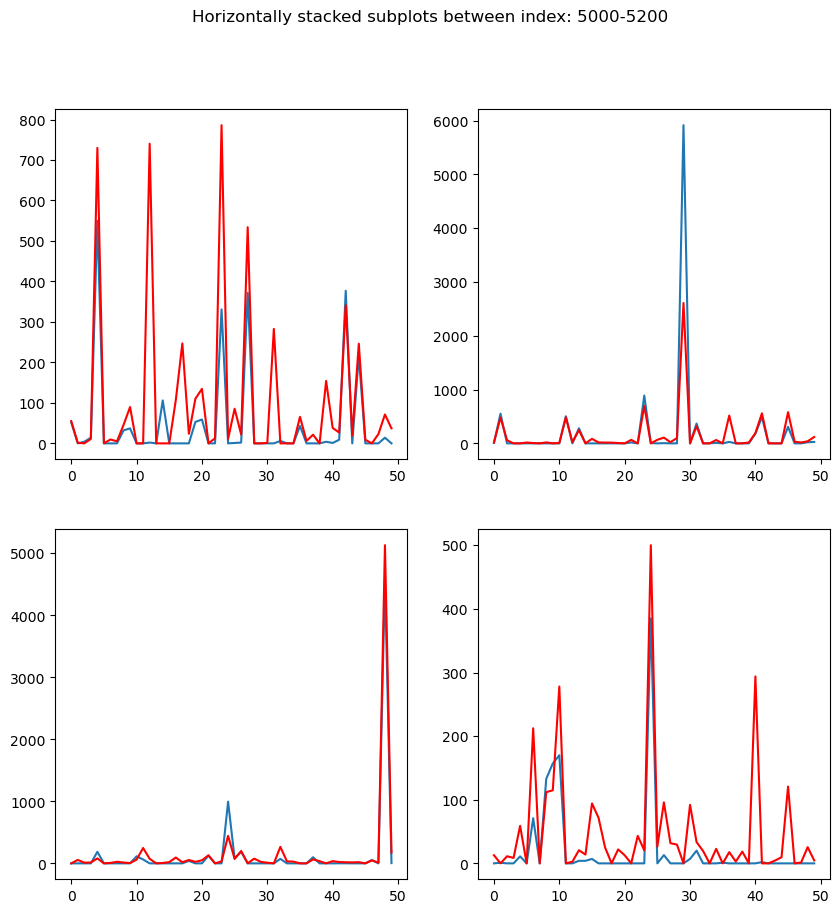

In [32]:
analyze_pred.plot_pred_vs_orig(5000,50,Y_waittimedata_test,y_pred.ravel())

In [33]:
from sklearn.metrics import r2_score
r2_score(Y_waittimedata_test.to_numpy(),y_pred)

0.6799446662539324